# PSYC 5P02- Introduction to Programming for Psychology
## Fall 2025

### Problem Set #4 - Grading Rubric

### Assigned November 14 25 - Due November 24
### Late Penalty: 5%/day


### Rubric:
* Accuracy & Efficiency: 50%
* Explaination and documentation: 50%

---

## **Question 1 --- Creating and Exploring Data with NumPy**

You will simulate data for **40 participants**, each completing **50 trials per condition** (100 trials total).

1.  Use NumPy to generate
    * Participant IDs (1-40)
    * Two Conditions: "congruent" and "incongruent"
    * Reaction times:
    - Congruent: mean = 520 ms, SD = 70 ms
    - Incongruent: mean 610 ms, SD = 70 ms
    * Add +/- 20ms uniformly distributed noise to all RTs
2.  Create a Pandas DataFrame with the columns: "participant", "condition", and "rt"
3.  Using the `df.head()` method and the df.describe(), display the first 10 rows of the DataFrame, and teh summary statistics

In [6]:

# %% Load Packages

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# I might need to add other packages for question 6

# %% 
"""
Question 1 - Creating and Exploring Data with NumPy

"""

# %% Participant IDs

subID = np.arange(start=1, stop=41, step=1)

# https://numpy.org/devdocs/reference/generated/numpy.arange.html

# %% Two Conditions: "congruent" and "incongruent"

conditions = np.array(['congruent', 'incongruent'])

# https://numpy.org/doc/stable/reference/generated/numpy.array.html

# %% Reaction Times:

rtCon = np.random.normal(loc=520, scale=70, size = 2000)

rtIncon = np.random.normal(loc=610, scale=70, size = 40*50)

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

# %% Adding Noise to RTs

noiseCon = np.random.uniform(low=-20, high = 20, size=2000)

noiseIncon = np.random.uniform(low=-20, high = 20, size=2000)

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

rtConNoise = (rtCon + noiseCon)

rtInconNoise = (rtIncon + noiseIncon)

'''
NOTE: I've included how I completed each piece outside of the function b/c that's how I did it originally
Then I kept it b/c I documented it nicely :P
'''

# %%

def trialDataRandomization(subID):
    data = [] # placeholder
    for subject in subID: # loops through each participant from the sudID list

        # RT data
        rtCon = np.random.normal(loc=520, scale=70, size=50) # Generates 50 congruent RTs
        rtIncon = np.random.normal(loc=610, scale=70, size=50) # Generates 50 incongruent RTs

        # Noise data
        noiseCon = np.random.uniform(low=-20, high=20, size=50) # Creates a uniform distributed noise for 50 trials
        noiseIncon = np.random.uniform(low=-20, high=20, size=50)
        
        # Adds the noise to the RT data, creating a new list to store them

        rtConNoise = rtCon + noiseCon
        rtInconNoise = rtIncon + noiseIncon
        
        # Loops through each RT and creates a row for each trial (basically a list of trial data)
        for rt in rtConNoise:
            data.append([subject, "congruent", rt])


        for rt in rtInconNoise:
            data.append([subject, "incongruent", rt])
            
    return pd.DataFrame(data, columns=["participant", "condition", "rt"]) # Returns a pandas data frame assigning labels to the lists

df = trialDataRandomization(subID)

'''
https://www.datacamp.com/tutorial/synthetic-data-generation

This example showed me how I wanted my data to be structured, I followed the Techniques for Synthetic Data Generation, particularly
2. Rule-based generation as it created a function.

https://www.geeksforgeeks.org/python/create-a-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/

This helped me realize that I needed to create lists for the trial data, as every example had data within lists. 
'''
# %%

# By placing this within a function, I could test it out for one participant at time.

df1 = trialDataRandomization('1')

# %% df.head()

df.head(10) # prints the first 10 rows

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

df.describe()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# %%

,participant,rt
count,4000.00000,4000.000000
mean,20.50000,564.884259
std,11.54484,83.113070
min,1.00000,306.161736
25%,10.75000,508.136966
50%,20.50000,564.949027
75%,30.25000,621.238113
max,40.00000,838.361764


**Comments:**
- Good. Does everything it should, pretty efficiently.
- I appreciate you trying to use functions but in this case, you only call each function once so perhaps *less* efficient, although I appreciate you actually assigning it to a df and you wanted to build in the flexibility to change the number of subjects which is fun. 
- For some reason both or the `head` and `describe` are not displaying but I'm assuming that's a weird quirk between Spyder or some other IDE and Notebooks.
- Code 6/6, documentation 6/6 **total: 12/12**

## **Question 2 --- Loading and Cleaning Data with Pandas**



1.  Using **indexing** (do NOT write a loop!), remove trials with RTs below 150 ms or above 1500 ms
2.  Print the number of trials removed.\
3.  Create a **cleaned DataFrame**. 
    * We didn't really cover this in class, so I'm going to give you the code, and you tell me what it's doing:


    `by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()`


In [7]:

# %% Remove trials using indexing

cleanDF = df.mask((df["rt"] > 800) | (df["rt"] < 300)) # Boolean indexing, evalutes true or false

# https://www.w3schools.com/python/pandas/ref_df_mask.asp

"""
This a bit different then how I indexed and removed RTs during Problem Set 2, I filtered through them instead which does not create NaN values

"""

# %% Print the number of trials removed

print("Number of Trials removed =", cleanDF["rt"].isnull().sum()) # counts the number of Na values

# https://www.geeksforgeeks.org/python/count-nan-or-missing-values-in-pandas-dataframe/ 

# %% Create a cleaned DataFrame

by_participant = cleanDF.groupby(["participant", "condition"])["rt"].mean().reset_index()

'''
EXPLAINATION OF FUNCTION: 
    
cleanDF.groupby will group the data by participant number and condition, since there is two conditions it will automatically create both

the participant argument allows for group by to grab participant number

["rt"].mean().reset_index() computes the mean RT for each participant, seperately by condition it is the aggregation operation, applying mean function

reset_index) rests the index of the data frame, which used to be 4000

I'm familar with this as the function group_by() in R I utilize a lot. Especially when data is organized in long format like this. 

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/
'''

Number of Trials removed = 5


'\nEXPLAINATION OF FUNCTION: \n    \ncleanDF.groupby will group the data by participant number and condition, since there is two conditions it will automatically create both\n\nthe participant argument allows for group by to grab participant number\n\n["rt"].mean().reset_index() computes the mean RT for each participant, seperately by condition it is the aggregation operation, applying mean function\n\nreset_index) rests the index of the data frame, which used to be 4000\n\nI\'m familar with this as the function group_by() in R I utilize a lot. Especially when data is organized in long format like this. \n\n# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html\n# https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/\n'

**Comments:**
- Good
- code: 3/3, documentation 3/3, **total: 6/6**

## **Question 3 --- Merging DataFrames**

Using the cleaned data

1.  Compute the mean RT for each condition **without using `groupby`**.
    -   Hint: use boolean masks and `.mean()`.\
2.  Add a column called "accuracy", and add value of 1 or 0 to each trial, with a 80% chance of the value being a 1 (correct)\
3.  Re-calcualte the mean RT for each condition for only accurate trials. Feel free to use `groupby` for this. (**NOTE:** In class `groupby` was not working and we thought it was beause it was deprecated. It was only the `axis`` option that was deprecated. `groupby` appears to still very much be a useful tool.

In [8]:
# %% Compute the mean RT for each condition without groupby

# Congruent 

congruentDF = by_participant.mask(by_participant["condition"] == "incongruent")

meanCon = (congruentDF["rt"].mean())

print("Mean for the Congruent Condition =",round(meanCon, 2))

# Incongruent

IncongruentDF = by_participant.mask(by_participant["condition"] == "congruent")

meanIncon = (IncongruentDF["rt"].mean())

print("Mean for the Incongruent Condition =",round(meanIncon, 2))


# %% Add accuracy column

# The method used to calculate cleaned data grouped it to a df of 80 rows, I would need to use the cleanDF that I made earlier but drop the unused columns

# B/c I'm adding back trial data

cleanDF = cleanDF.dropna() 

len(cleanDF)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

accuracy = [0, 1]

random.choices(accuracy, weights=(0.2, 0.8))

accList = random.choices(accuracy, weights=(0.2, 0.8), k = len(cleanDF))

cleanDF.insert(3, "accuracy", accList)

# https://www.geeksforgeeks.org/python/choose-elements-from-list-with-different-probability-in-python/
# https://www.w3schools.com/python/ref_random_choices.asp

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html - inserting columns

# %% mean RT accurate conditions

# Creating a new df with only accurate trials

accDF = cleanDF.mask(cleanDF["accuracy"] == 0) 

accDF = accDF.dropna()

accDF.groupby(["condition"])["rt"].mean().reset_index() 

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

# in R, I would not have created a new data frame. First, I'd filter it to accuracy = 1, then run my groupby function. Handy for instances where you only want accurate trials.

# Below, I do filter through the data, but I couldn't figure out how to combine filter and group by 

# %%

Mean for the Congruent Condition = 521.22
Mean for the Incongruent Condition = 608.05


,condition,rt
0,congruent,520.759797
1,incongruent,606.905851


**comments:**
- Good, although your definition of hte conditions specifies the incorrect conditions relative to the variable created and the documentation. 
- code: 6/6, documentation: 5/6 **total: 11/12**

## **Question 4 --- Plotting with Matplotlib**

Using the cleaned RT data from Question 2:

1.  Plot a histogram of RTs for each condition side-by-side (two subplots)\
2.  A mean RT bar graph (congruent vs. incongruent) with standard error error bars. (**Note:** you may need to look at the documentation for `matplotlib bar`) \
3.  Label axes clearly and give descriptive titles.
4.  Change at least 2 properties of the plots from the default options (i.e., colors, markers, axis labels, etc.)

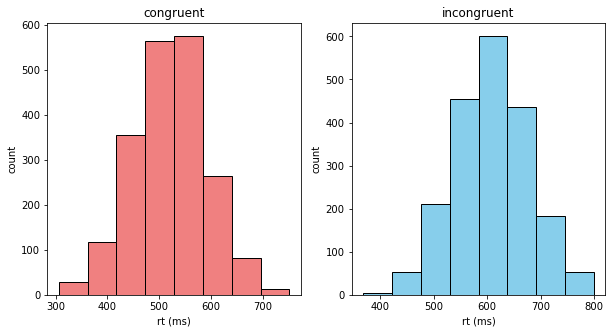

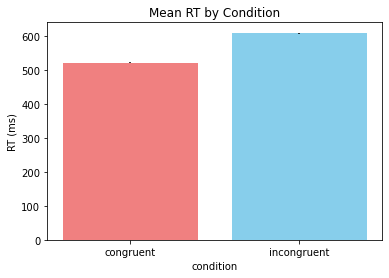

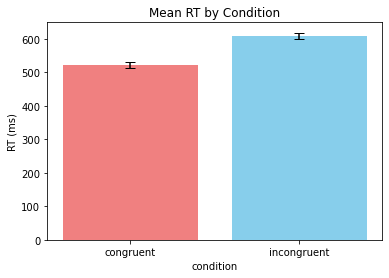

"\nB/c of how I generated my reaction time data, per participant with a mean of 520 and sd of 70, the sample sd it relatively small (~8ms).\n\nThis makes the error bars basically non-existent. \n\nIf I had drawn a sample of RT's across all trials with that specification, I would end up with something more like what I presented above.\n\nHowever, I think it was difficult to differentiate between whether those parameters were for each participant, or the entire sample (results for this question vary a lot)\n\nSince if you do it per participant, like I did, you lose variability within the sample. \n\nA potential solution I thought of, was to first generate a mean and SD for each participant within the parameters, then \ngenerate their trial data from that.\n"

In [9]:
fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)


axes1.hist(cleanDF[cleanDF["condition"] == "congruent"]["rt"], bins=8, color ='lightcoral', edgecolor = 'black')
axes1.set_title("congruent")
axes1.set_ylabel("count")
axes1.set_xlabel("rt (ms)")



axes2.hist(cleanDF[cleanDF["condition"] == "incongruent"]["rt"], bins = 8, color = 'skyblue', edgecolor = 'black')
axes2.set_title("incongruent")
axes2.set_ylabel("count")
axes2.set_xlabel("rt (ms)")

plt.show()

# My understanding is that a histogram is for distribution of trial data, all observations. But maybe
# you meant to use the by_participant?

# https://www.geeksforgeeks.org/python/how-to-plot-a-pandas-dataframe-with-matplotlib/

# For specifically matplot and pandas df

# https://www.geeksforgeeks.org/pandas/ways-to-filter-pandas-dataframe-by-column-values/

# filtering the data frame to only certain conditions is really helpful! I couldn't figure out how to use it for group.by above 

# %% Bar Graph

n =  40

# Compute sd for each condition

sdCon = (by_participant[by_participant["condition"] == "congruent"]["rt"].std())

sdIncon = (by_participant[by_participant["condition"] == "incongruent"]["rt"].std())

# Compute SE for each condition

seCon = sdCon / np.sqrt(n)

seIncon = sdIncon / np.sqrt(n)

# Create a data frame with means per condition for plotting

data = {'condition': ['congruent', 'incongruent'], 'mean': [meanCon, meanIncon]}
barDF = pd.DataFrame(data) # Convert into a pd df

# Plotting data

plt.bar(barDF['condition'], barDF['mean'], yerr = [seCon, seIncon], color = ["lightcoral", "skyblue"]) 
plt.title("Mean RT by Condition")
plt.xlabel("condition")
plt.ylabel("RT (ms)")

plt.show()

# https://www.geeksforgeeks.org/python/how-to-plot-a-pandas-dataframe-with-matplotlib/ - plotting with a pd data frame

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

# https://numpy.org/doc/stable/reference/generated/numpy.std.html - standard deviation

# https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html#numpy.sqrt - square root

# %%
# Example using the sd, to demonstrate what the error bars should look like
plt.bar(barDF['condition'], barDF['mean'], yerr = [sdCon, sdIncon], color = ["lightcoral", "skyblue"], capsize = 5)
plt.title("Mean RT by Condition")
plt.xlabel("condition")
plt.ylabel("RT (ms)")

plt.show() 

# %%
"""
B/c of how I generated my reaction time data, per participant with a mean of 520 and sd of 70, the sample sd it relatively small (~8ms).

This makes the error bars basically non-existent. 

If I had drawn a sample of RT's across all trials with that specification, I would end up with something more like what I presented above.

However, I think it was difficult to differentiate between whether those parameters were for each participant, or the entire sample (results for this question vary a lot)

Since if you do it per participant, like I did, you lose variability within the sample. 

A potential solution I thought of, was to first generate a mean and SD for each participant within the parameters, then 
generate their trial data from that.
"""

**Commnents:**
- Good.
- code 6/6, documentation 6/6. **total: 12/12**

## **Question 5 --- Plotting with Seaborn**

Using Seaborn:

1.  Create a violin plot of RTs by condition. (You may need to look at the violin plot documentation)
2.  Create a line plot with condition on the x-axis and RT on the y axis, using different hues for each participant. 


Text(0.5, 1.0, 'Line Plot of mean RT by condition')

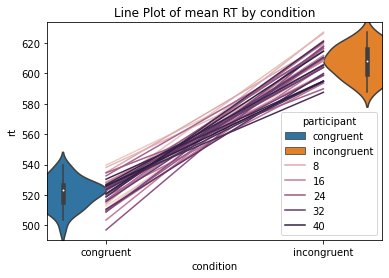

In [10]:


# %% Violin Plot

violin = sns.violinplot(data=by_participant, x="condition", y="rt", hue = "condition")

violin.set_title('Violin Plot of mean RT by condition')

# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# %% Line Plot

line = sns.lineplot(data=by_participant, x="condition", y="rt", hue="participant", legend = "auto")

line.set_title('Line Plot of mean RT by condition')

# I did request legend as "full" it was huge, so I opted to include the auto legend. 

# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# %%


**Comments:**
- When running together, plots do something weird. But given that you've specified them as separate cells using the notation for Spyder, it is possible that someone would just run the full .py file (it doesn't force execution by cells like Notebooks does). Soemthing to consider.
- code: 2/3, documentation: 3/3, **total: 5/6**


## **Question 6 --- Curve Fitting: Visual Working Memory Capacity**

Researchers often measure visual working memory capacity (K) across
increasing memory loads.\
You are given:

    loads = np.array([1, 2, 3, 4, 5, 6])
    k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

There are different models that describe the change in performance. One is a model that increases linearly up to a breakpoint (capacity limit), then stays flat.\

This is a model with **two stages**:

1.  **Linear growth stage:**\
    Performance increases steadily as memory load increases. 

2.  **Flat stage (capacity limit):**\
    After a certain point (the **breakpoint**), performance stops
    increasing because the memory system has reached its limit.\
    The breakpoint is the **estimated capacity**.


The model can be expressed as:

    if load ≤ k_break:
        y = a * load + b    # K is increasing with load
    else:
        y = a * k_break + b   # K stays constant

The second model is an exponential model. This model can be expressed as:



    y = A * (1 – exp(-B * load)) + C


  1. Fit both models to the data, where x is `load` and y is `k`. Report the relevant parameters for each model.  
  2. Plot both fits on the same Figure and subplot (do not use two subplots) using `matplotlib`


Two Stage Model Parameters: A = 0.9 B = -0.0 k break = 3.89
Exponential Model Parameters: A = 4.97 B = 0.41 C = -0.82


/Users/semrich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


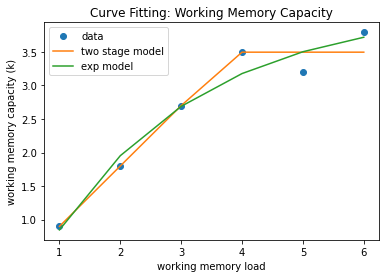

In [11]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

load = np.array([1, 2, 3, 4, 5, 6]) 
k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

# Defining two-stage model

def twoStageModel(x, a, b, k_break): 
    y_vals = [] # list of y values 
    for load in x: # loops through each memory load value, determines if capacity limit is reached
        if load <= k_break:
            y = a * load + b    # K is increasing with load
        else:
            y = a * k_break + b   # K stays constant)
        y_vals.append(y)
    return np.array(y_vals)

# Fitting the two-stage model using curve_fit  
twoParam, twoCovar = curve_fit(twoStageModel, load, k)

# Predicted y values for each capacity limit (x) - plotting
fit_twoStage = twoStageModel(load, twoParam[0], twoParam[1], twoParam[2])

# Plotting the two-stage model
plt.plot(load, k, 'o', label='data')
plt.plot(load, fit_twoStage, '-', label='two stage model')


# Defining exponetial model
def expModel(x, A, B, C):
    return A * (1 - np.exp(-B * x)) + C

# Fitting the exponetial model using curve_fot
expParam, expCovar = curve_fit(expModel, load, k)

# Predicted y values for each capacity limit (x) - plotting
fit_exp = expModel(load, expParam[0], expParam[1], expParam[2])

# Plotting the exponetial model

plt.plot(load, fit_exp, '-', label='exp model')

# Labelling plot
plt.legend()
plt.xlabel('working memory load')
plt.ylabel('working memory capacity (k)')
plt.title('Curve Fitting: Working Memory Capacity')

# Printing relevant model parameters

print('Two Stage Model Parameters:', 'A =', round(twoParam[0], 2), 'B =', round(twoParam[1], 2), 'k break =', round(twoParam[2], 2)) 

print('Exponential Model Parameters:', 'A =', round(expParam[0], 2), 'B =', round(expParam[1], 2), 'C =', round(expParam[2], 2)) 


# https://www.geeksforgeeks.org/machine-learning/scipy-curve-fitting/#google_vignette

# for this question, I also followed the Gaussan example from lecture. 

**Comments:**
- Would maybe like some more explanation about why one function definition includes a loop and the other doesn't.
- Your continuous model has breaks at each value of load, which is not usually how we draw a continuous function. Is there a way to fix this?


- code: 5/6, documentation: 5/6, **total: 10/12**

**Total grade: 56/60**